In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/Adithya-Suresh/TITANTIC/master/train.csv",index_col=0)
print(df.head())
print(df.info())

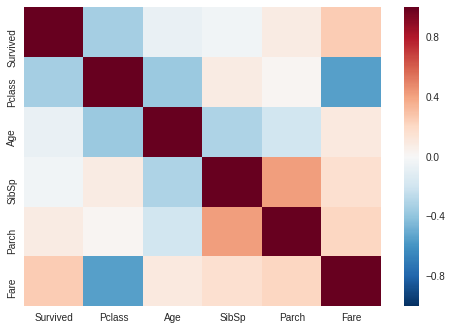

In [0]:
sns.heatmap(df.corr())

In [0]:
df.Age.fillna(df.Age.mean(),inplace=True)
df.drop(columns = ["Cabin","Name","Ticket"],inplace = True)
df = pd.get_dummies(df)
print(df.columns)
print(df.info())
X = df.loc[:,["Pclass","Age","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]
y = df.loc[:,["Survived"]]


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.1 KB
None


In [0]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
y_p=rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_p))

0.8100558659217877


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
test = pd.read_csv("https://raw.githubusercontent.com/Adithya-Suresh/TITANTIC/master/test.csv",index_col=0)
test.Fare.fillna(test.Fare.mean(),inplace=True)
test.Age.fillna(test.Age.mean(),inplace=True)
sex=pd.get_dummies(test["Sex"])
em=pd.get_dummies(test["Embarked"])
b=[sex,em]
test=test.join(b)
test.drop(columns=["Cabin","Sex","Embarked"],inplace=True)
print(test.info())
print(test.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Pclass    418 non-null int64
Name      418 non-null object
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Ticket    418 non-null object
Fare      418 non-null float64
female    418 non-null uint8
male      418 non-null uint8
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), object(2), uint8(5)
memory usage: 48.2+ KB
None
             Pclass                                          Name   Age  \
PassengerId                                                               
892               3                              Kelly, Mr. James  34.5   
893               3              Wilkes, Mrs. James (Ellen Needs)  47.0   
894               2                     Myles, Mr. Thomas Francis  62.0   
895               3                              Wirz, Mr. Albert  27.0   
896       

In [0]:
X_testset = test.loc[:,["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S"]]
sns.heatmap(X_testset.corr())
print(X_testset.info())
X_testset = s.fit_transform(X_testset)
y_pred = rfc.predict(X_testset)
print(y_pred.shape)
dic = {}
dic['PassengerId'] = test.index
dic['Survived'] = y_pred

df = pd.DataFrame(dic)
df.set_index("PassengerId",inplace = True)
print(df.head(100))
df.to_csv('submission2.csv')